In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
A2=np.array([[ 0,  1,  0,  1,  0,  0,  0,  0],
             [ 1,  0,  1,  0,  1,  0,  0,  0],
             [ 0,  1,  0,  0,  0,  1,  0,  0],
             [ 1,  0,  0,  0,  1,  0,  1,  0],
             [ 0,  1,  0,  1,  0,  1,  1,  0],
             [ 0,  0,  1,  0,  1,  0,  0,  1],
             [ 0,  0,  0,  1,  1,  0,  0,  1],
             [ 0,  0,  0,  0,  0,  1,  1,  0]])

In [3]:
def draw_graph(A):
    plt.figure()
    g = nx.Graph()
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
                if A[i,j] == 1:
                    g.add_edge(i+1,j+1)
    nx.draw_spectral(g, with_labels=True)

In [4]:
def convert_adjacency(A):
    graph = []
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if i <= j:
                if A[i,j] == 1:
                    graph.append([i+1,j+1])
    return graph

In [5]:
graph = convert_adjacency(A2)
cycles = []
def main():
    global graph  
    global cycles
    for edge in graph:
        for node in edge:
            findNewCycles([node])
#     return cycles
    for cy in cycles:
        path = [str(node) for node in cy]
        s = ",".join(path)
        print(s)

def findNewCycles(path):
    start_node = path[0]
    next_node= None
    sub = []

    #visit each edge and each node of each edge
    for edge in graph:
        node1, node2 = edge
        if start_node in edge:
                if node1 == start_node:
                    next_node = node2
                else:
                    next_node = node1
                if not visited(next_node, path):
                        # neighbor node not on path yet
                        sub = [next_node]
                        sub.extend(path)
                        # explore extended path
                        findNewCycles(sub);
                elif len(path) > 2  and next_node == path[-1]:
                        # cycle found
                        p = rotate_to_smallest(path);
                        inv = invert(p)
                        if isNew(p) and isNew(inv):
                            cycles.append(p)

def invert(path):
    return rotate_to_smallest(path[::-1])

#  rotate cycle path such that it begins with the smallest node
def rotate_to_smallest(path):
    n = path.index(min(path))
    return path[n:]+path[:n]

def isNew(path):
    return not path in cycles

def visited(node, path):
    return node in path

main()

1,4,5,6,3,2
1,4,7,5,6,3,2
1,4,7,8,6,3,2
1,4,5,7,8,6,3,2
1,4,5,2
1,4,7,8,6,5,2
1,4,7,5,2
2,5,6,3
2,5,4,7,8,6,3
2,5,7,8,6,3
4,7,8,6,5
4,7,5
5,7,8,6


In [6]:
cycles.sort(key=len)
cycles

[[4, 7, 5],
 [1, 4, 5, 2],
 [2, 5, 6, 3],
 [5, 7, 8, 6],
 [1, 4, 7, 5, 2],
 [4, 7, 8, 6, 5],
 [1, 4, 5, 6, 3, 2],
 [2, 5, 7, 8, 6, 3],
 [1, 4, 7, 5, 6, 3, 2],
 [1, 4, 7, 8, 6, 3, 2],
 [1, 4, 7, 8, 6, 5, 2],
 [2, 5, 4, 7, 8, 6, 3],
 [1, 4, 5, 7, 8, 6, 3, 2]]

In [7]:
def select_fundamental_cycles(cycles):
    fundamental_cycle_set = []
    cycles.sort(key=len)
    for i in range(len(cycles)):
        if(i<4):
            fundamental_cycle_set.append(cycles[i])
    return fundamental_cycle_set  

In [8]:
sets = select_fundamental_cycles(cycles)
sets

[[4, 7, 5], [1, 4, 5, 2], [2, 5, 6, 3], [5, 7, 8, 6]]

In [9]:
def extend_length(sets):
    
    for i in range(len(sets)):
        for j in range(8-len(sets[i])):
             sets[i].extend([0])
    return sets

In [10]:
c = extend_length(sets)
c

[[4, 7, 5, 0, 0, 0, 0, 0],
 [1, 4, 5, 2, 0, 0, 0, 0],
 [2, 5, 6, 3, 0, 0, 0, 0],
 [5, 7, 8, 6, 0, 0, 0, 0]]

In [11]:
def convert_to_adjacency(cycles, A):
    
    no_of_cycles = len(cycles)
    no_of_vertices = (A.shape[0])
    
    MD = {}

    for k in range(len(cycles)):
        MD['M'+str(k)] = np.zeros((no_of_vertices,no_of_vertices),dtype='object')
        for j in range(no_of_vertices):
            if(cycles[k][j]!=0):
                if(cycles[k][j+1]!=0):
                    MD["M"+str(k)][cycles[k][j]-1][cycles[k][j+1]-1] = 1
                    MD["M"+str(k)][cycles[k][j+1]-1][cycles[k][j]-1] = 1
                else:
                    MD["M"+str(k)][cycles[k][j]-1][cycles[k][0]-1] = 1
                    MD["M"+str(k)][cycles[k][0]-1][cycles[k][j]-1] = 1  
                    
    return MD

In [12]:
MD = convert_to_adjacency(c, A2)

In [13]:
MD

{'M0': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 1, 0],
        [0, 0, 0, 1, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], dtype=object),
 'M1': array([[0, 1, 0, 1, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0, 0, 0],
        [0, 1, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], dtype=object),
 'M2': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 0, 0],
        [0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], dtype=object),
 'M3': array([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0

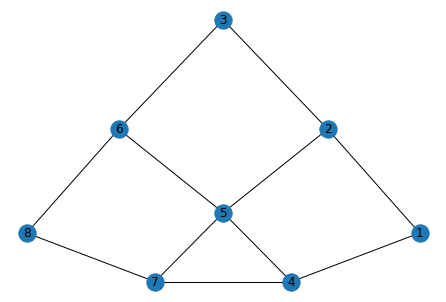

In [14]:
draw_graph(A2)

In [16]:
# def first_link(arr, N):
#     for i in range(0,N):
#         for j in range(0,N):
#             if arr[i][j] == 1:
#                arr[j][i] = 0
#                 return (i,j)

In [17]:
# def loop_orientation(D, m, N):
#     for k in range(0,m):
#         arr = D[k]  # arr is current independent loop
#         i,j = first_link(arr,N)
#         for l in range(0,N):
#             for n in range(0,N):
#                 if arr[j][n] == 1:
#                     arr[n][j] = 0
#                     j = n
#         D[k] = arr
#     return D        

In [18]:
# import numpy as np
# def main_circuit(D,m,N):
#     A = np.zeros((N,N))
#     for i in range(0,N):
#         for j in range(0,N): 
#             for k in range(0,m):
#                 if D[k][i][j] == 1:
#                     A[i][j] = 1
                    
#     return(A)

In [19]:
# def main():
#     m = 4
#     N = 8
#     D = [MD['M0'],MD['M1'],MD['M2'],MD['M3']]
#     D = loop_orientation(D,m,N)
#     T = main_circuit(D,m,N)
#     return T

In [20]:
# if __name__ == '__main__':
#     X = main()

In [21]:
###X

In [22]:
###draw_graph(X)

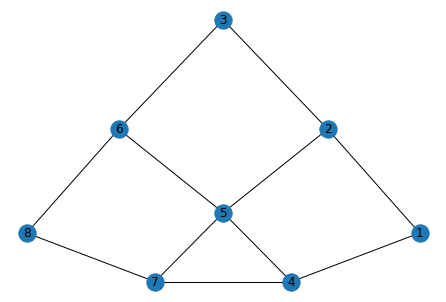

In [23]:
draw_graph(A2)

In [24]:
MD['M0']

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [127]:
def fun(A,c):
    B = np.copy(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[0]):
            if (B[i][j] == 1):
                B[i][j] = c
            else:
                B[i][j] = ''         
    return B

In [128]:
Y = fun(MD['M0'],'i1')

In [67]:
MD['M0']

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]], dtype=object)

In [68]:
Z = fun(np.multiply(MD['M0'],MD['M1']),'-i2)')

[['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '-i2)' '' '' '']
 ['' '' '' '-i2)' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']]


In [69]:
Z

array([['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '-i2)', '', '', ''],
       ['', '', '', '-i2)', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '']], dtype=object)

In [70]:
U = fun(np.multiply(MD['M0'],MD['M2']),'-i3)')

[['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']]


In [86]:
W = fun(np.multiply(MD['M0'],MD['M3']),'-i4)') 

[['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '' '' '-i4)' '']
 ['' '' '' '' '' '' '' '']
 ['' '' '' '' '-i4)' '' '' '']
 ['' '' '' '' '' '' '' '']]


In [87]:
EL1 = Y+Z+U+W

In [88]:
EL1

array([['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', 'i1-i2)', '', 'i1', ''],
       ['', '', '', 'i1-i2)', '', '', 'i1-i4)', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', 'i1', 'i1-i4)', '', '', ''],
       ['', '', '', '', '', '', '', '']], dtype=object)

In [89]:
R = np.zeros((8,8),dtype='object')

In [90]:
R[0,1] = str(10)+'*('
R[1,2] = str(20)+'*('
R[3,4] = str(100)+'*('
R[1,4] = str(200)+'*('
R[4,5] = str(100)+'*('
R[4,6] = str(210)+'*('
R[6,7] = str(20)+'*('

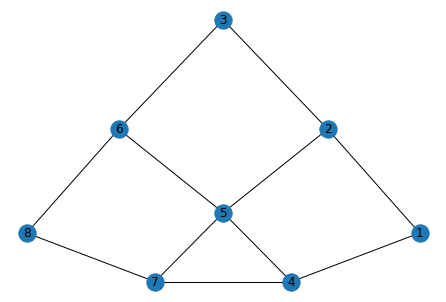

In [91]:
draw_graph(A2)

In [92]:
for i in range(8):
    for j in range(8):
        if(R[i][j]==0):
            R[i,j]=''

In [93]:
for i in range(8):
    for j in range(8):
        if(i>j):
            Res[i,j]=''

In [94]:
Res

array([['', '10*(', '', '', '', '', '', ''],
       ['', '', '20*(', '', '200*(', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '100*(i1-i2)', '', 'i1', ''],
       ['', '', '', '', '', '100*(', '210*(i1-i4)*', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '20*('],
       ['', '', '', '', '', '', '', '']], dtype=object)

In [95]:
Res = np.add(R,EL1)    

In [96]:
Res

array([['', '10*(', '', '', '', '', '', ''],
       ['', '', '20*(', '', '200*(', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '100*(i1-i2)', '', 'i1', ''],
       ['', '', '', 'i1-i2)', '', '100*(', '210*(i1-i4)', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', 'i1', 'i1-i4)', '', '', '20*('],
       ['', '', '', '', '', '', '', '']], dtype=object)

In [97]:
for i in range(8):
    for j in range(8):
        if(EL1[i][j]==''):
            Res[i,j]=''

In [98]:
Res

array([['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '100*(i1-i2)', '', 'i1', ''],
       ['', '', '', 'i1-i2)', '', '', '210*(i1-i4)', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', 'i1', 'i1-i4)', '', '', ''],
       ['', '', '', '', '', '', '', '']], dtype=object)

In [100]:
for i in range(8):
    for j in range(8):
        if(EL1[i][j]!='' and R[i][j]==''):
            Res[i,j]=''

In [101]:
Res

array([['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '100*(i1-i2)', '', '', ''],
       ['', '', '', '', '', '', '210*(i1-i4)', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', ''],
       ['', '', '', '', '', '', '', '']], dtype=object)

In [121]:
eq = ''
c = 0
s = 0
for i in range(8):
    for j in range(8):
        if(Res[i][j]!=''):
            s = s+1    
print(s)

2


In [123]:
for i in range(8):
    for j in range(8):
        if(Res[i][j]!=''):
            c = c+1
            eq = eq + Res[i,j]
            if(c<=s-1):
                eq +=str('+')

In [124]:
eq

'100*(i1-i2)+210*(i1-i4)'

In [126]:
"END"

'END'

In [ ]:
def equation_solver(C,c1,c2,c3,c4):
    